In [33]:
import os

In [34]:
os.chdir(r"C:\Users\vbaburao\Documents") 
os.getcwd()

'C:\\Users\\vbaburao\\Documents'

In [41]:
dataframe= pd.read_csv('decision tree.csv')

In [42]:
dfr =dataframe.drop('Date',axis=1)


In [43]:
dfr.head()

,Covid cases,City traific,sales data
0,2.0,1.12,59168881.42
1,2.0,1.16,61797572.85
2,4.0,1.13,61957686.01
3,8.0,1.18,60915291.16
4,14.0,1.17,61825051.68


In [44]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10.0, 5.0)  

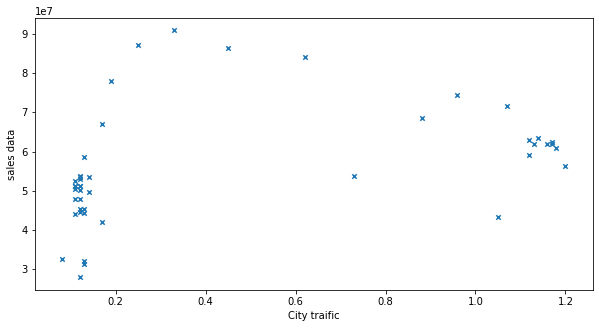

In [45]:
dfr.plot('City traific', 'sales data', kind = 'scatter', marker = 'x');

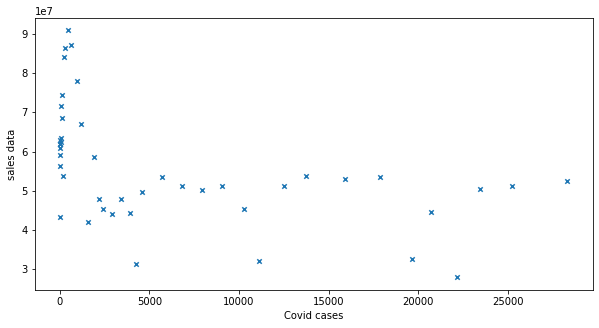

In [46]:
dfr.plot('Covid cases', 'sales data', kind = 'scatter', marker = 'x');

In [47]:
def preprocess_for_regularization(dfr,y_column_name, x_column_name):
    dfr_cp = dfr.copy()
    to_return = pd.DataFrame(columns = [y_column_name] + x_column_name)
    mean_y = np.mean(dfr_cp[y_column_name])
    to_return[y_column_name] = [x - mean_y for x in dfr_cp[y_column_name]]
    for item in x_column_name:
        mean_x = np.mean(dfr_cp[item])
        std_x = np.std(dfr_cp[item])
        to_return[item] = dfr_cp[item].apply(lambda x: (x - mean_x)/std_x)
        return to_return

        

In [48]:
def preprocess_for_regularization(dfr,y_column_name, x_column_name):
    y=dfr[y_column_name].tolist()
    y_mean= np.mean(y).tolist()
    norm_y = [(float(i)-y_mean) for i in y]

    
    a= x_column_name[0]
    b= x_column_name[1]
    a=dfr[a].tolist()
    b=dfr[b].tolist()
    std_a= np.std(a,axis=0, ddof=0)
    mean_a= np.mean(a)
    norm_a = [(float(i)-mean_a)/std_a for i in a]
    std_b= np.std(b,axis=0, ddof=0)
    mean_b= np.mean(b)
    norm_b = [(float(i)-mean_b)/std_b for i in b]
    dict={"Covid cases":norm_a,'City traific':norm_b,"sales data":norm_y}
    df = pd.DataFrame(dict) 
    return df
        

In [49]:
prepro_data = preprocess_for_regularization(dfr,'sales data', ['Covid cases','City traific'])
prepro_data

,Covid cases,City traific,sales data
0,-0.768180,1.532356,3.123109e+06
1,-0.768180,1.623477,5.751801e+06
2,-0.767934,1.555136,5.911914e+06
3,-0.767444,1.669037,4.869519e+06
4,-0.766708,1.646257,5.779280e+06
5,-0.766095,1.714598,3.768682e+05
6,-0.765360,1.372893,-1.276324e+07
7,-0.764746,1.532356,6.937601e+06
8,-0.764256,1.646257,6.384297e+06
9,-0.762049,1.577916,7.403834e+06


In [50]:

X_a = prepro_data.drop('sales data', axis=1)
Y_b = prepro_data['sales data']

In [51]:
X = dfr.drop('sales data', axis=1)
Y = dfr['sales data']

In [52]:
X=X[["Covid cases","City traific"]]

a=X.min()
b=X.max()
X= (X - a) / (b - a)
X

,Covid cases,City traific
0,0.000000,0.928571
1,0.000000,0.964286
2,0.000071,0.937500
3,0.000212,0.982143
4,0.000424,0.973214
5,0.000600,1.000000
6,0.000812,0.866071
7,0.000989,0.928571
8,0.001130,0.973214
9,0.001766,0.946429


In [53]:
Y = dfr['sales data']
c=Y.min()
d=Y.max()
Y= (Y - c) / (d - c)
Y

0     0.496464
1     0.538205
2     0.540747
3     0.524195
4     0.538641
5     0.452857
6     0.244208
7     0.557034
8     0.548248
9     0.564437
10    0.694520
11    0.736917
12    0.645926
13    0.412375
14    0.891185
15    0.928156
16    1.000000
17    0.938947
18    0.794472
19    0.620225
20    0.226261
21    0.486496
22    0.317198
23    0.276495
24    0.258357
25    0.318677
26    0.261618
27    0.053923
28    0.345389
29    0.407070
30    0.371360
31    0.353965
32    0.371788
33    0.275602
34    0.067114
35    0.368664
36    0.412572
37    0.397567
38    0.407968
39    0.076210
40    0.265706
41    0.000000
42    0.359953
43    0.370788
44    0.390784
Name: sales data, dtype: float64

In [54]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
X=X.values
splits = TimeSeriesSplit(n_splits=4)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
	X_train = X[train_index]
	X_test = X[test_index]
	print('Observations: %d' % (len(X_train) + len(X_test)))
	print('Training Observations: %d' % (len(X_train)))
	print('Testing Observations: %d' % (len(X_test)))

Observations: 18
Training Observations: 9
Testing Observations: 9
Observations: 27
Training Observations: 18
Testing Observations: 9
Observations: 36
Training Observations: 27
Testing Observations: 9
Observations: 45
Training Observations: 36
Testing Observations: 9


<Figure size 720x360 with 0 Axes>

In [55]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot
Y = Y
splits = TimeSeriesSplit(n_splits=4)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(Y):
	Y_train = Y[train_index]
	Y_test = Y[test_index]
	print('Observations: %d' % (len(Y_train) + len(Y_test)))
	print('Training Observations: %d' % (len(Y_train)))
	print('Testing Observations: %d' % (len(Y_test)))

Observations: 18
Training Observations: 9
Testing Observations: 9
Observations: 27
Training Observations: 18
Testing Observations: 9
Observations: 36
Training Observations: 27
Testing Observations: 9
Observations: 45
Training Observations: 36
Testing Observations: 9


<Figure size 720x360 with 0 Axes>

In [96]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import r2_score

### Note, the "alpha" parameter defines regularization strength.
### Lambda is a reserved word in `Python` -- Thus "alpha" instead

### An alpha of 0 is equivalent to least-squares regression
lr = LinearRegression()
reg = Ridge(alpha = 11)
reg0 = Ridge(alpha = 0)

# Notice how the consistent sklearn syntax may be used to easily fit many kinds of models
for m, name in zip([lr, reg, reg0], ["LeastSquares","Ridge alpha = 10","Ridge, alpha = 0"]):
    
    m.fit(X, Y)
    print(name, "Intercept:", m.intercept_, "Coefs:",m.coef_,"\n")




LeastSquares Intercept: 0.4837681475759149 Coefs: [-0.31149307  0.0976311 ] 

Ridge alpha = 10 Intercept: 0.44082011082422323 Coefs: [-0.08344411  0.07474423] 

Ridge, alpha = 0 Intercept: 0.48376814757591496 Coefs: [-0.31149307  0.0976311 ] 



Gridsearch

In [97]:
#from sklearn.model_selection import GridSearchCV
#ridge=Ridge()
#parameters={"alpha":[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}
#ridge_regressor=GridSearchCV(ridge,parameters,scoring="neg_mean_squared_error",cv=5)
#ridge_regressor.fit(X_train, Y_train)
#ridge_regressor.score(X_train,Y_train)



In [98]:
#print(ridge_regressor.best_params_)
#print(ridge_regressor.best_score_)

#Cross validation

In [99]:
from sklearn.model_selection import cross_val_score
ridge=Ridge()
ridge_regressor=cross_val_score(ridge,X_train,Y_train,scoring="neg_mean_squared_error",cv=5)
ridge_regressor


array([-0.04304628, -0.03979956, -0.18206635, -0.07768328, -0.02665017])

In [100]:
rmse_ridge = np.sqrt(-cross_val_score(Ridge(), X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
rmse_ridge

array([0.20747597, 0.19949828, 0.42669234, 0.27871721, 0.16324879])

Text(0, 0.5, 'rmse')

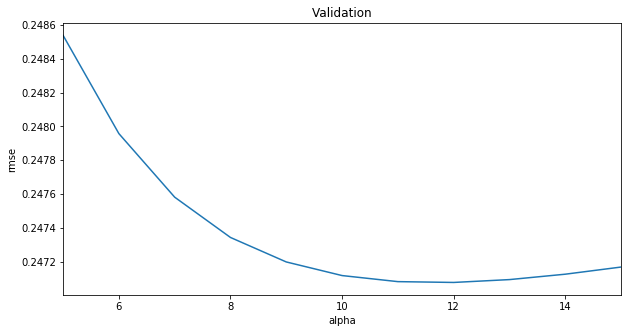

In [101]:
alphas = [5,6,7,8,9,10,11,12,13,14,15]
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [102]:
pred=m.predict(X_test)



In [83]:
pred


array([0.33639236, 0.31208274, 0.29085308, 0.26777556, 0.25928358,
       0.24342183, 0.22867934, 0.20852766, 0.17489019])

In [104]:
from sklearn import metrics
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, pred))  
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, pred)))
print(r2_score(Y_test, pred))

Mean Absolute Error: 0.13662409194588607
Mean Squared Error: 0.023665663093121125
Root Mean Squared Error: 0.15383648167167996
-0.10981187722093
